# <center>⚡️🏁 Quick start - тестируем простое решение</center>

In [1]:
!pip install numpy pandas catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

## Анализируем данные о машинах car_info

🚗 Главное описание машин с информацией о поломках для обучения / прогноза - `car_train.csv` / `car_test.csv`.

**Пояснение столбцов:**
- `car_id` - идентификатор машины
- `model` / `car_type` / `fuel_type`- марка, класс и тип топлива машины
- `car_rating` / `riders` - общий рейтинг  и общее число поездок к концу 2021-го кода.
- `year_to_start` / `year_to_work` - года выпуска машины и начала работы в автопарке
- `main_city` - город пребывания машины. (Москва или Питер)
- `target_reg` - количество дней до поломки.
- `target_class` - класс поломки (всего 9 видов)

(2337, 10)


car_id         model car_type fuel_type  car_rating  year_to_start  \
109   J-2221564E  Smart ForTwo  economy    petrol        5.62           2015   
1389  D88344444z       VW Polo  economy    petrol        3.10           2014   
1451  h-2096845p   Smart Coupe  economy    petrol        4.76           2014   

      riders  year_to_work  target_reg     target_class  
109    77620          2016       50.80  engine_ignition  
1389   60207          2022       75.44  engine_ignition  
1451   65374          2017       66.50     engine_check

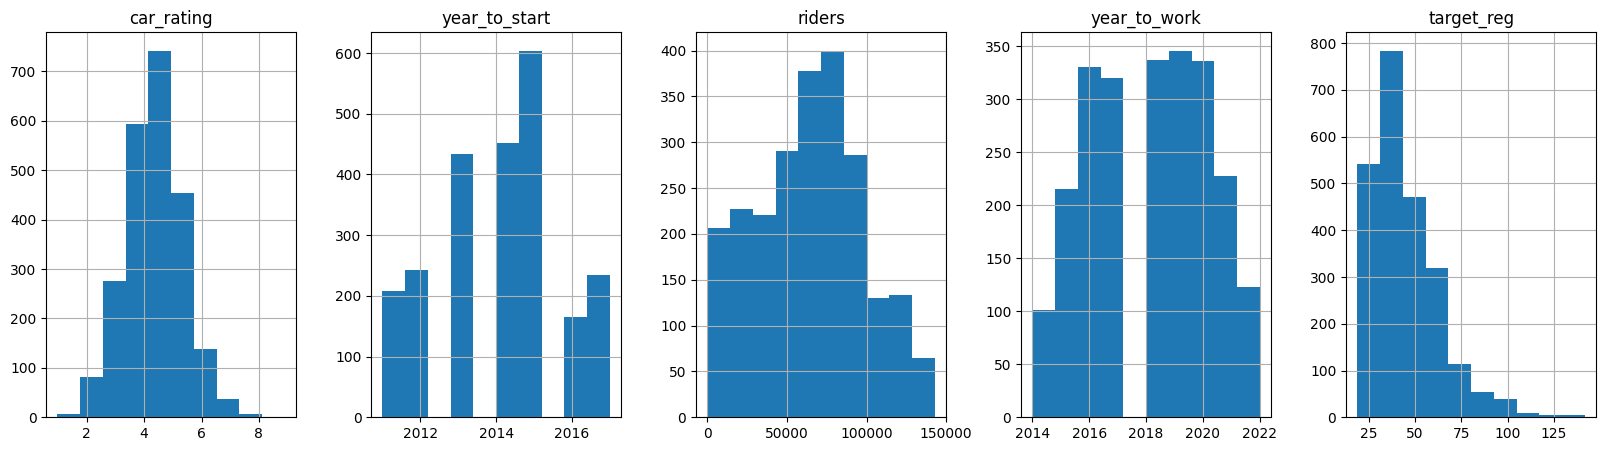

In [3]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv'
train = pd.read_csv(path)
print(train.shape)
train.hist(figsize=(20, 5), layout = (-1, 5))
train.sample(3)

In [4]:
train.describe()

car_rating  year_to_start         riders  year_to_work   target_reg
count  2337.000000    2337.000000    2337.000000   2337.000000  2337.000000
mean      4.354292    2014.040650   63711.443731   2018.069748    44.946735
std       0.996954       1.685852   33755.012096      2.159484    17.579568
min       0.980000    2011.000000      23.000000   2014.000000    18.920000
25%       3.740000    2013.000000   41053.000000   2016.000000    31.670000
50%       4.360000    2014.000000   64415.000000   2018.000000    40.170000
75%       5.000000    2015.000000   86515.000000   2020.000000    54.790000
max       8.900000    2017.000000  142862.000000   2022.000000   141.630000

In [5]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_test.csv'
test = pd.read_csv(path)
print(test.shape)
test.sample(3)

(1913, 8)


car_id             model  car_type fuel_type  car_rating  \
612  H-1512213s      Kia Sportage  standart    petrol        4.40   
392  m-1018494E  Volkswagen ID.4    premium   electro        4.38   
891  S71464104w      Kia Sportage  standart    petrol        3.92   

     year_to_start  riders  year_to_work  
612           2012   25251          2018  
392           2014   63393          2017  
891           2015   81667          2017

## Классифицируем признаки на типы

In [6]:
features2drop = ['car_id'] # то что надо выбросить
targets = ['target_class', 'target_reg'] # таргеты
cat_features = ['car_type', 'fuel_type', 'model'] # категориальные признаки

filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]

print('cat_features :', len(cat_features), cat_features)
print('num_features :', len(num_features), num_features)
print('targets', targets)

cat_features : 3 ['car_type', 'fuel_type', 'model']
num_features : 4 ['car_rating', 'year_to_start', 'riders', 'year_to_work']
targets ['target_class', 'target_reg']


## Обучаем Catboost и делаем прогноз на тест

In [7]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #, mean_squared_error

In [8]:
X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CatBoostClassifier(cat_features=cat_features)


clf.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=150, plot=False)

# инференс модели
y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

Learning rate set to 0.109335
0:	learn: 2.1911361	test: 2.1951349	best: 2.1951349 (0)	total: 102ms	remaining: 1m 41s
150:	learn: 1.6539682	test: 2.2440578	best: 2.1908935 (6)	total: 14s	remaining: 1m 18s
300:	learn: 1.2455381	test: 2.3306861	best: 2.1908935 (6)	total: 29.1s	remaining: 1m 7s
450:	learn: 0.9685364	test: 2.4038621	best: 2.1908935 (6)	total: 38.5s	remaining: 46.9s
600:	learn: 0.7432300	test: 2.4962387	best: 2.1908935 (6)	total: 48s	remaining: 31.9s
750:	learn: 0.5835086	test: 2.5783601	best: 2.1908935 (6)	total: 56.4s	remaining: 18.7s
900:	learn: 0.4589187	test: 2.6654857	best: 2.1908935 (6)	total: 1m 6s	remaining: 7.25s
999:	learn: 0.3990111	test: 2.7166606	best: 2.1908935 (6)	total: 1m 12s	remaining: 0us

bestTest = 2.19089351
bestIteration = 6

Shrink model to first 7 iterations.

 Accuracy: 0.0876068376068376


In [9]:
test['target_class'] = clf.predict(test[filtered_features])
# test[['car_id', 'target_class']].to_csv('../subs/simple_baseline_v1.csv', index=False)
# print('CSV file saved!')

## Добавим информацию про поездки из rides_info


🏇 Информация про поездки - `rides_info.csv`.  **Пояснение столбцов:**
- `user_id` / `car_id` / `ride_id` - идентификаторы водителя, машины, поездки соответственно
- `ride_date` / `rating` - дата поездки и рейтинг, поставленный водителем
- `ride_duration` / `distance` / `ride_cost` -  длительность (время),  пройденное расстояние, стоимость поездки
- `speed_avg` / `speed_max` - средняя и максимальная скорости поездки соответственно
- `stop_times` / `refueling` - количество остановок (паузы) и флаг - была ли дозаправка.
- `user_ride_quality` - оценка манеры вождения машины водителя, определенная скоринговой ML системой сервиса.
- `deviation_normal` - общий показатель датчиков о состоянии машины, относительно эталонных показателей (нормы).


In [10]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv'
rides = pd.read_csv(path)
rides.sample(5)

user_id      car_id ride_id   ride_date  rating  ride_duration  \
47686   Y16325055A  D-1642232Y     X1D  2020-01-06    2.27             61   
265451  K76411178I  S11426971O     l1u  2020-02-23    5.16             78   
719699  n90626288y  y19339480p     s1a  2020-01-19    5.93             31   
419582  a14195475y  d15745111A     S1G  2020-02-06    0.97             13   
634146  u20790093D  s33252064R     x1I  2020-02-18    5.83             26   

        ride_cost  speed_avg   speed_max  stop_times     distance  refueling  \
47686         543         32   75.000000           1  1064.341363          0   
265451        930         37   58.000000           1   476.522062          0   
719699        335         49   62.000000           1  1491.198794          0   
419582        201         47  130.000000           0   634.386929          0   
634146        202         81  124.428815           0  2194.993279          0   

        user_ride_quality  deviation_normal  
47686           -4.458897            17.088  
265451         -13.596635            -1.392  
719699          -4.029443             5.887  
419582         -12.379766            28.858  
634146          -9.532529            -6.143

In [11]:
f = lambda x: x.nunique()
rides_df_gr = rides.groupby('car_id', as_index=False).agg(mean_rating = ('rating', 'mean'),
                                                   distance_sum = ('distance', 'sum'),
                                                   rating_min = ('rating', 'min'),
                                                   speed_max = ('speed_max', 'max'),
                                                   user_ride_quality_median = ('user_ride_quality', 'median'),
                                                   deviation_normal_count = ('deviation_normal', 'count'),
                                                   user_uniq = ('user_id', f))


rides_df_gr.head(2)

car_id  mean_rating  distance_sum  rating_min   speed_max  \
0  A-1049127W     4.255172  1.125753e+07         0.1  179.729652   
1  A-1079539w     4.088046  1.912765e+07         0.1  184.505566   

   user_ride_quality_median  deviation_normal_count  user_uniq  
0                 -0.288229                     174        172  
1                  2.508746                     174        173

In [12]:
def add_featues(df):

    if 'mean_rating' not in df.columns:
        return df.merge(rides_df_gr, on = 'car_id', how = 'left')

    return df


train = add_featues(train)
test = add_featues(test)

In [13]:
train.sample(2)

car_id            model  car_type fuel_type  car_rating  \
232   t15817307U   Renault Kaptur  standart    petrol        4.46   
1414  I-2277221J  Hyundai Solaris   economy    petrol        4.92   

      year_to_start  riders  year_to_work  target_reg  target_class  \
232            2015   79278          2019       76.29  engine_check   
1414           2014   56415          2017       26.43   engine_fuel   

      mean_rating  distance_sum  rating_min  speed_max  \
232      4.706609  1.077633e+07         0.1  159.00000   
1414     3.970000  1.854794e+07         0.1  172.07134   

      user_ride_quality_median  deviation_normal_count  user_uniq  
232                   4.720260                     174        173  
1414                  3.391384                     174        171

In [14]:
# train.to_csv('../tmp_data/quickstart_train.csv', index=False)

In [15]:
# test.to_csv('../tmp_data/quickstart_tra.csv', index=False)

# Снова обновляем типы фичей

In [16]:
filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]


print('num_features :', len(num_features), num_features)
print('cat_features :', len(cat_features), cat_features)
print('targets', targets)

num_features : 11 ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']
cat_features : 3 ['car_type', 'fuel_type', 'model']
targets ['target_class', 'target_reg']


# Обучаем Catboost на новых данных и делаем новый прогноз

In [17]:
X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CatBoostClassifier(cat_features=cat_features)


clf.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=150, plot=False)

# инференс модели
y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

Learning rate set to 0.109335
0:	learn: 1.8475119	test: 1.8655808	best: 1.8655808 (0)	total: 71ms	remaining: 1m 10s
150:	learn: 0.3200590	test: 0.5547029	best: 0.5540463 (147)	total: 11.4s	remaining: 1m 4s
300:	learn: 0.1971982	test: 0.5615205	best: 0.5513186 (167)	total: 22.9s	remaining: 53.3s
450:	learn: 0.1358231	test: 0.5753409	best: 0.5513186 (167)	total: 34.5s	remaining: 42.1s
600:	learn: 0.0976373	test: 0.5939145	best: 0.5513186 (167)	total: 46.4s	remaining: 30.8s
750:	learn: 0.0733795	test: 0.6068865	best: 0.5513186 (167)	total: 58.9s	remaining: 19.5s
900:	learn: 0.0574033	test: 0.6209075	best: 0.5513186 (167)	total: 1m 10s	remaining: 7.7s
999:	learn: 0.0496109	test: 0.6291796	best: 0.5513186 (167)	total: 1m 17s	remaining: 0us

bestTest = 0.5513186112
bestIteration = 167

Shrink model to first 168 iterations.

 Accuracy: 0.782051282051282


In [18]:
fi = clf.get_feature_importance(prettified=True)
fi

Feature Id  Importances
0                  speed_max    36.034645
1                mean_rating    30.903684
2                 rating_min    13.938537
3                      model     4.206258
4                   car_type     3.881288
5                  user_uniq     3.035950
6   user_ride_quality_median     2.097702
7               distance_sum     1.614279
8                     riders     1.347984
9                 car_rating     1.149331
10              year_to_work     1.127178
11             year_to_start     0.644968
12                 fuel_type     0.018196
13    deviation_normal_count     0.000000

In [19]:
test['target_class'] = clf.predict(test[filtered_features])
# test[['car_id', 'target_class']].to_csv('../subs/simple_baseline_v2.csv', index=False)
# print('CSV file saved!')

# Summary
В этом уроке мы провели первичное исследование датасета: построили несколько прастых гистограм, проклассифицировали типы, и пообучали CatBoost

# Что дальше? Зашли решение на Kaggle

- Нажимаем `Save Version`
- Проверяем, что в `Advanced Settings` выбрано - всегда сохранять результаты ноутбука.
- Тип сохранения `Save & Run All (Commit)`
- Жмем окончательно кнопку `Save`